# FAA 1462 Pareja 10. Práctica 3 REGRESIÓN LOGÍSTICA Y ANÁLISIS ROC
## Kevin de la Coba Malam

En este documento se mostrarán los resultados del clasificador **Regresión Logística** usando diferentes *épocas* y *constantes de aprendizaje*. Posteriormente, se hará un **analísis ROC** de todos los clasificadores implementados. En este análisis se mostrarán **puntos sobre el espacio ROC** y una **curva ROC**.

En está practica, se han usado ambos tipos de validaciones, cruzada y simple. En concreto, con la validación cruzada se usan los valores K: **4, 6, 8, 10**. Para la validación simple se usán valores para el %: **25, 20, 15, 10**.

## Modificaciones
- Corrección en el clasificador K-NN. En el método *clasificar* siempre se normalizaban los datos, ahora solo se hace cuando el objeto tiene el atributo norm a true.


In [1]:
# Para esconder los warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from Datos import Datos
import utils
import MatrizConfusion as MC
import matplotlib.pyplot as plt

# Cargamos datos
pima = Datos("ConjuntosDatos/pima-indians-diabetes__a.data")
wdbc = Datos("ConjuntosDatos/wdbc__a.data")

## 1. Resultados Regresión Logística (Implementación propia)
A continuación se mostraran tablas en las cuales se realizan tests sobre los conjuntos de datos *pima* y *wdbc*. En estos tests la constante de aprendizaje varía entre **[0.5-2]** (en pasos de 0.5), y el número de épocas varía desde **[10-2000]** (en pasos de 15 hasta 100, y en pasos de 100 hasta 2000).

In [2]:
errorMedioPimaVC, errorMedioPimaVS, errorMedioWDBCVC, errorMedioWDBCVS = utils.RL_test(pima, wdbc)


*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=10*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=10 Constante aprendizaje=0.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.398148		0.562500
Validación Cruzada K-Folds=4			0.444444		0.437500
Validación Simple 20%				0.266667		0.266667
Validación Cruzada K-Folds=6			0.379630		0.444444
Validación Simple 15%				0.489583		0.583333
Validación Cruzada K-Folds=8			0.423077		0.500000
Validación Simple 10%				0.440000		0.600000
Validación Cruzada K-Folds=10			0.450000		0.400000
Test Épocas=10 Constante aprendizaje=1.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.398148		0.562500
Validación Cruzada K-Folds=4			0.351852		0.562500
Validación Simple 20%				0.438095		0.400000
Validación Cruzada K-Folds=6			0.425926		0.444444
Validación Simple 15%				0.458333		0.333333
Validación Cruzada K-Folds=8			0.432692		0.750000
Validación Simple 10%				0.410000		0.500000
Validación Cruzada K-Folds=10			0.430000		0.600000
Test Épocas=10 Constante ap

Validación Simple 20%				0.466667		0.533333
Validación Cruzada K-Folds=6			0.388889		0.666667
Validación Simple 15%				0.437500		0.583333
Validación Cruzada K-Folds=8			0.298077		0.500000
Validación Simple 10%				0.440000		0.700000
Validación Cruzada K-Folds=10			0.500000		0.400000

*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=70*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=70 Constante aprendizaje=0.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.351852		0.562500
Validación Cruzada K-Folds=4			0.481481		0.562500
Validación Simple 20%				0.438095		0.466667
Validación Cruzada K-Folds=6			0.481481		0.555556
Validación Simple 15%				0.364583		0.416667
Validación Cruzada K-Folds=8			0.451923		0.562500
Validación Simple 10%				0.460000		0.600000
Validación Cruzada K-Folds=10			0.390000		0.400000
Test Épocas=70 Constante aprendizaje=1.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.444444		0.562500
Validación Cruzada K-Folds=4			0.398148		0.437500
Validación Simple 20%				0.

### 1.1 Efecto del número de épocas.
A continuación se mostrarán varias gráficas en las cuales se puede ver la evolución del error con respecto al valor del número de épocas asignado para el entrenamiento.
#### 1.1.1 *Pima-Indians-Diabetes* Cte. aprendizaje=0.5

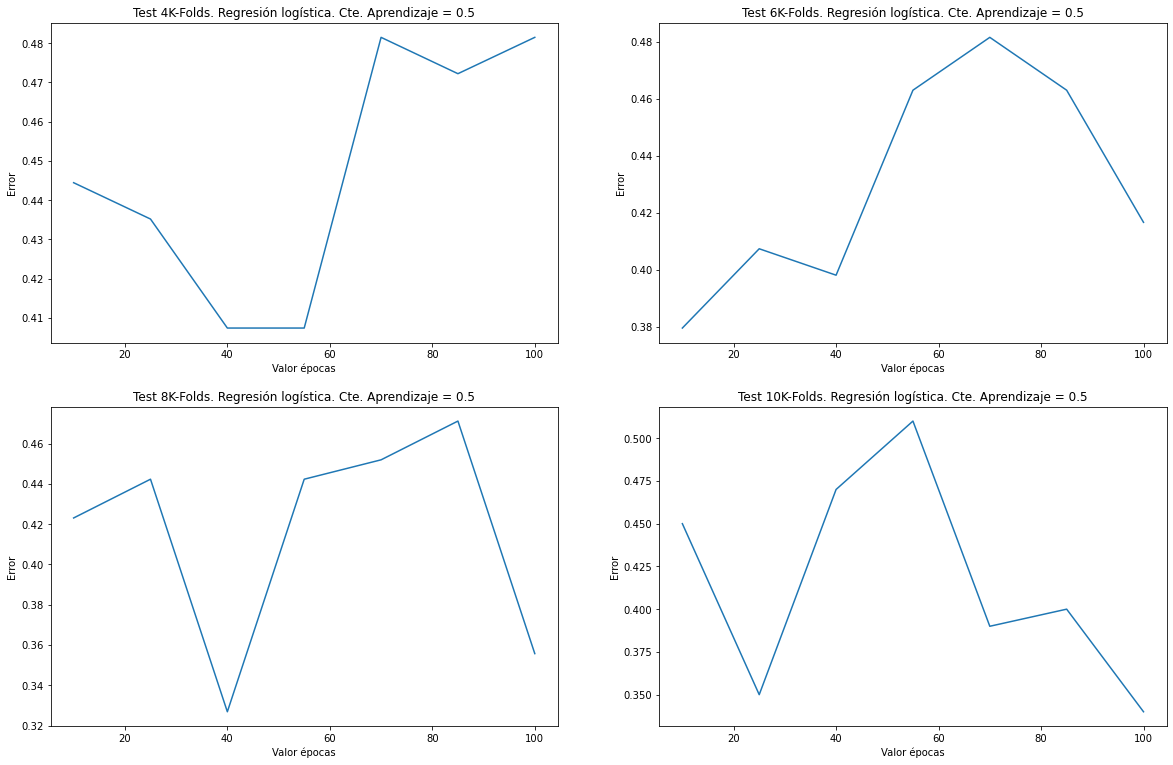

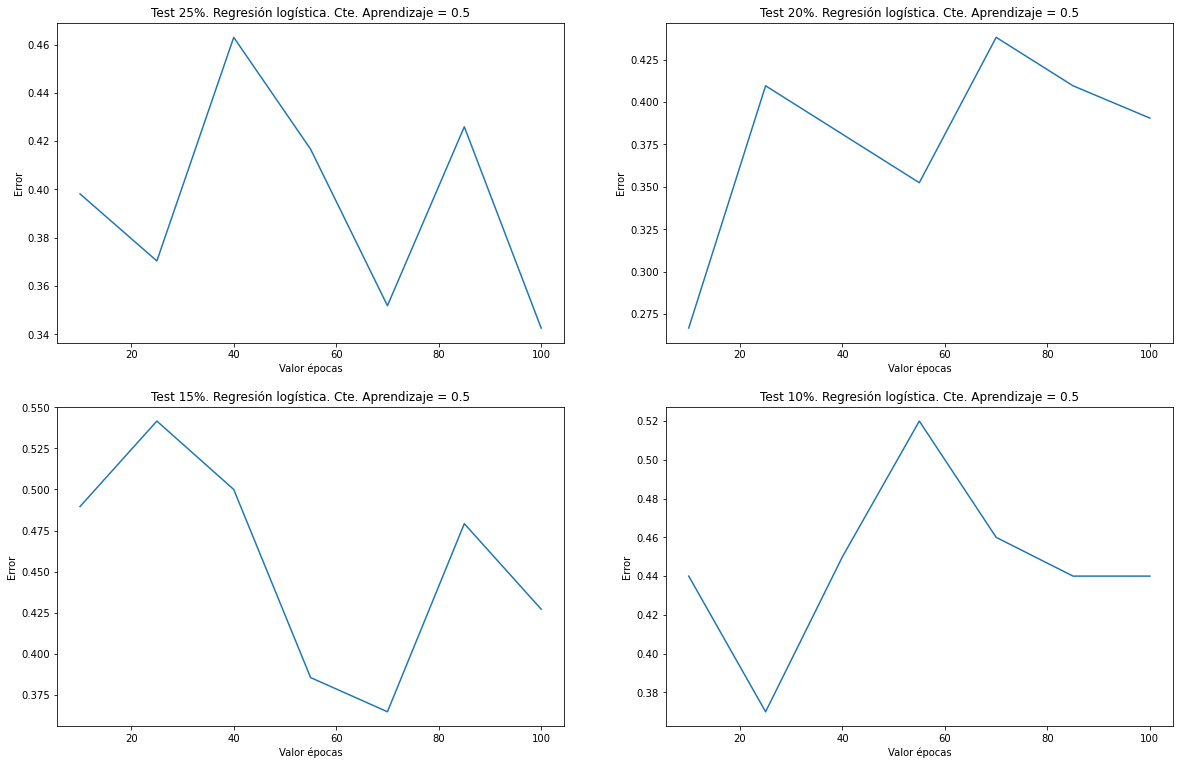

In [3]:
utils.plot_epoch(errorMedioPimaVC, 0.5, False)
utils.plot_epoch(errorMedioPimaVS, 0.5, True)

#### 1.1.1 *Pima-Indians-Diabetes* Cte. aprendizaje=1.0

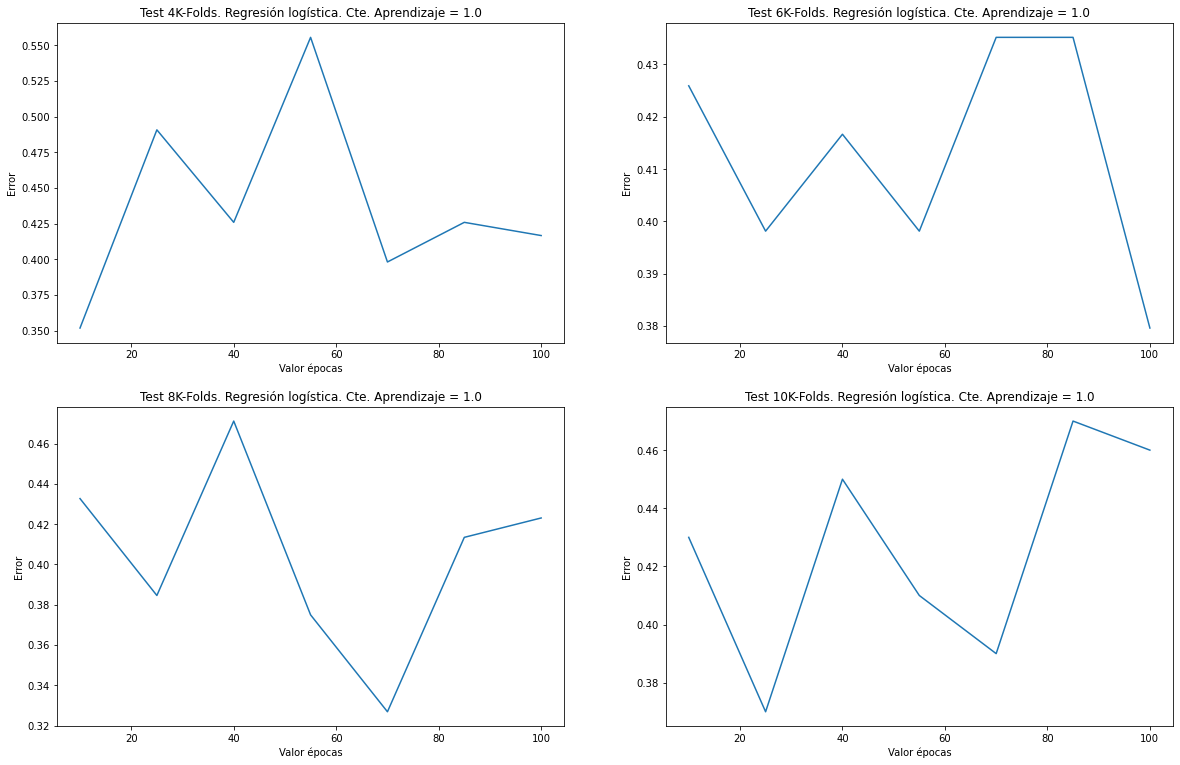

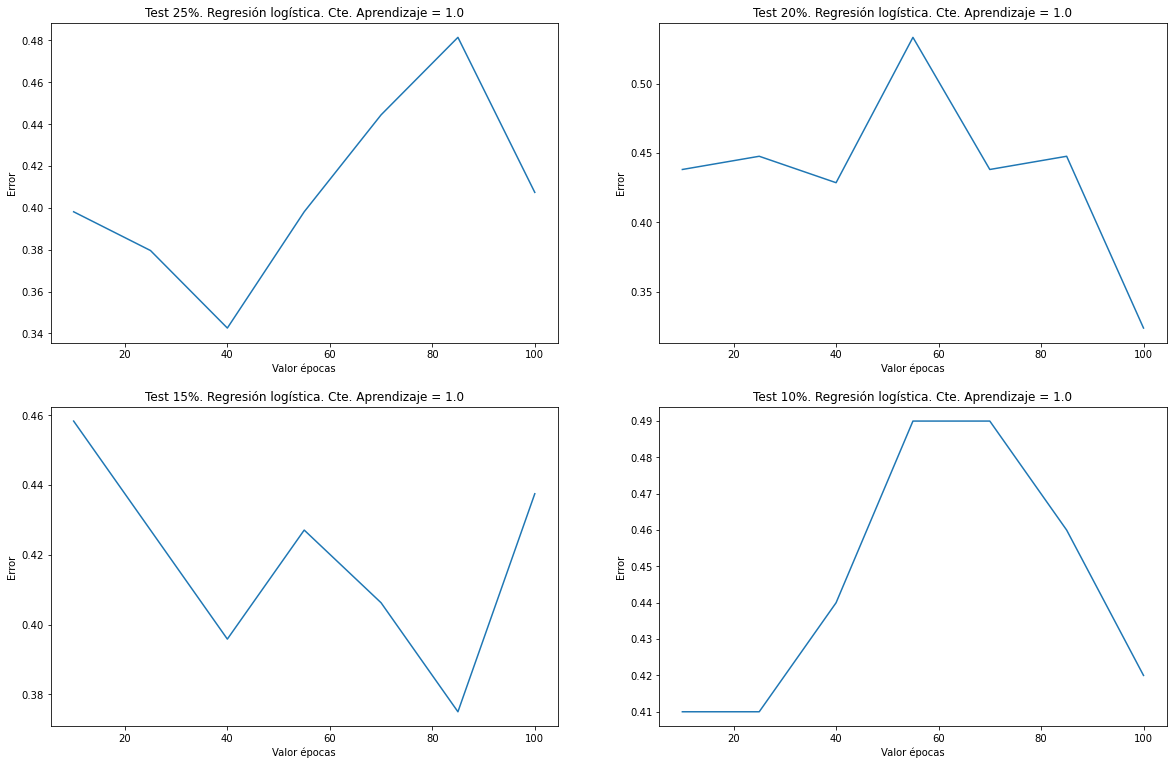

In [4]:
utils.plot_epoch(errorMedioPimaVC, 1.0, False)
utils.plot_epoch(errorMedioPimaVS, 1.0, True)

#### 1.1.1 *Pima-Indians-Diabetes* Cte. aprendizaje=1.5

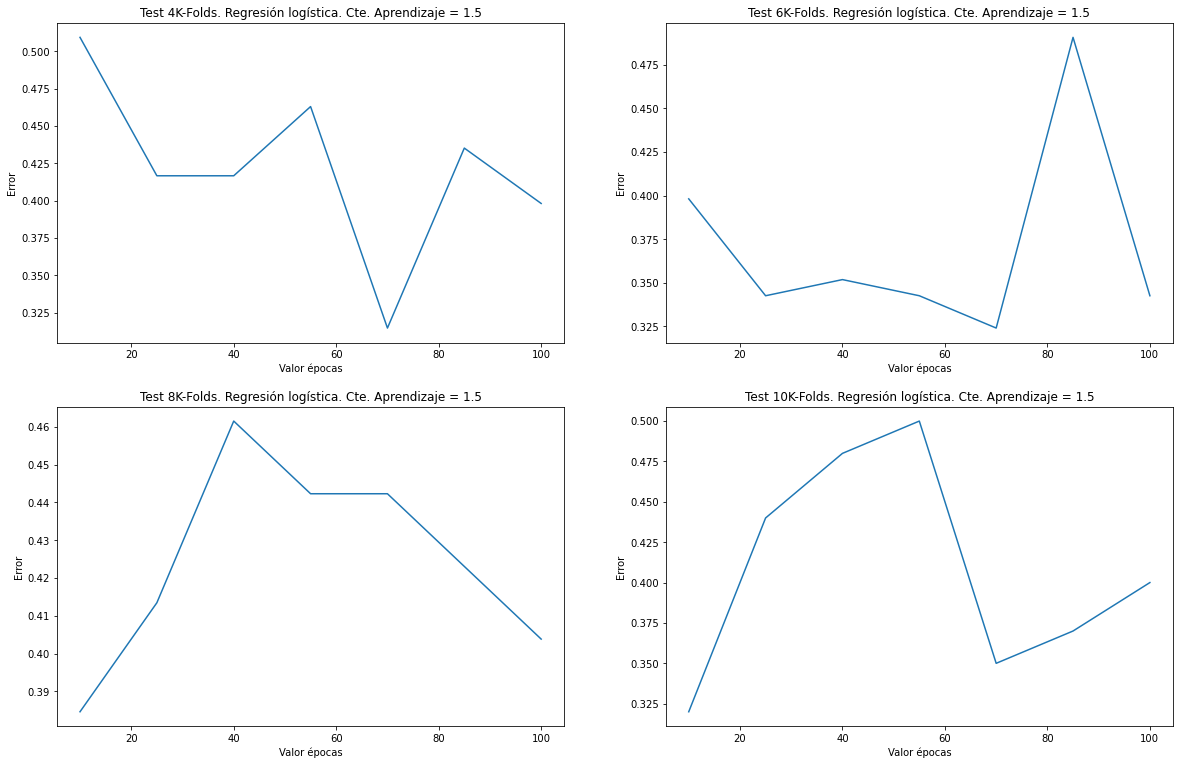

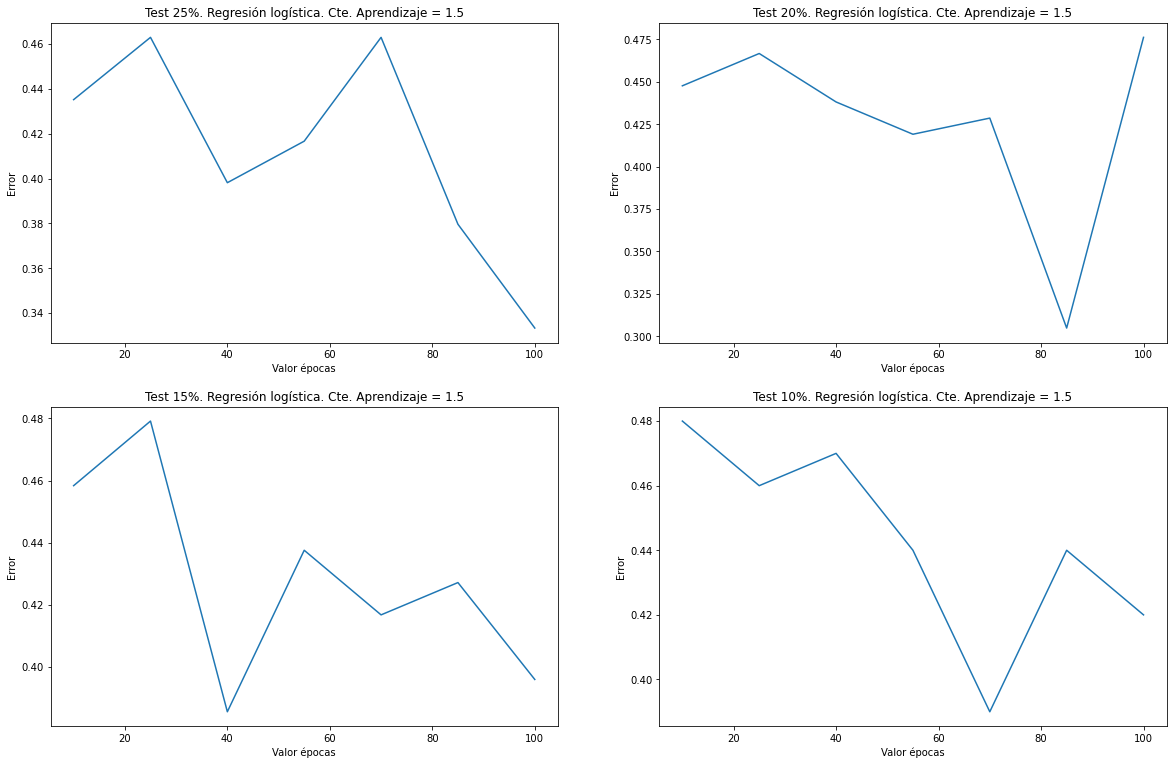

In [5]:
utils.plot_epoch(errorMedioPimaVC, 1.5, False)
utils.plot_epoch(errorMedioPimaVS, 1.5, True)

#### 1.1.1 *Pima-Indians-Diabetes* Cte. aprendizaje=2.0

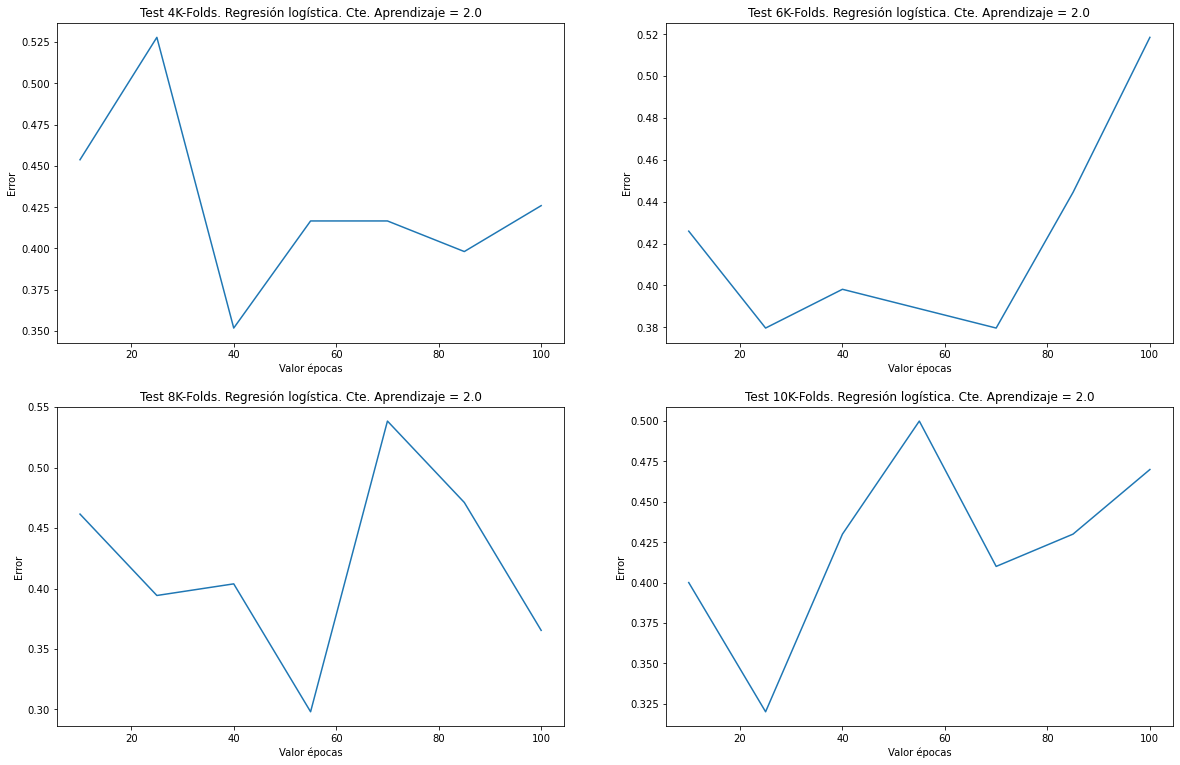

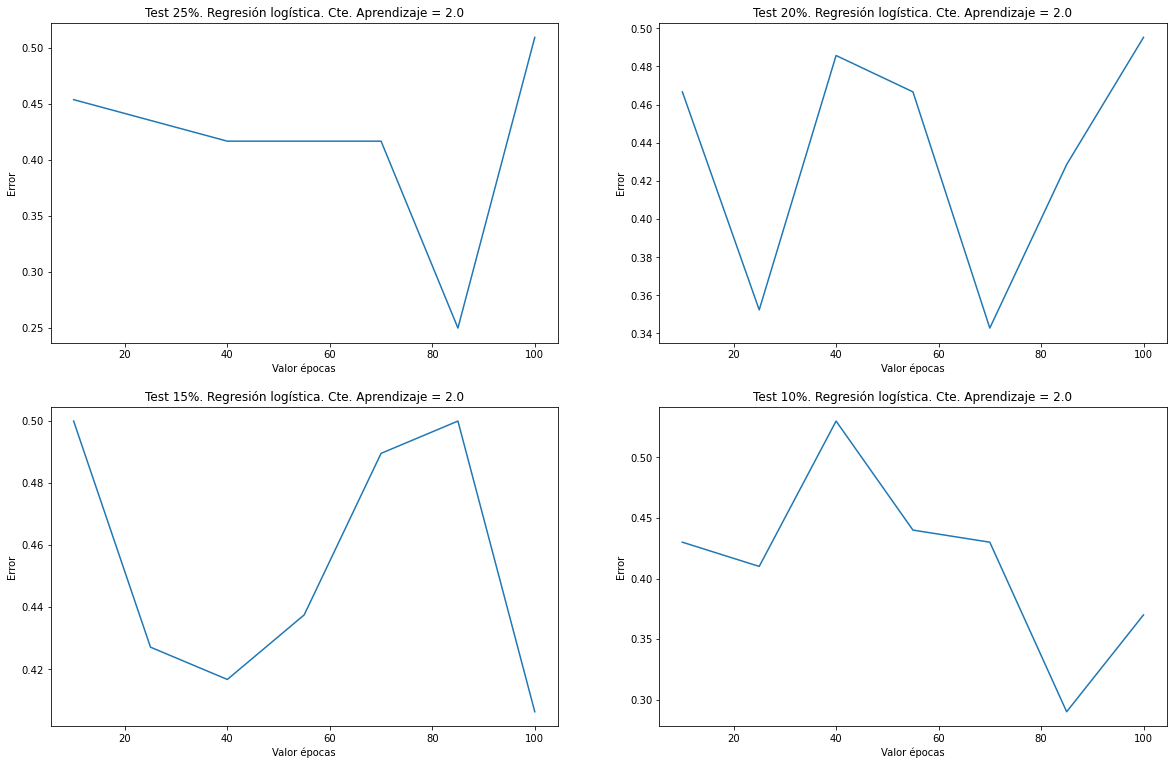

In [6]:
utils.plot_epoch(errorMedioPimaVC, 2.0, False)
utils.plot_epoch(errorMedioPimaVS, 2.0, True)

# EXPLICACIÓN EVOLUCION DE EPOCH EN PIMA
#### 1.1.2 *WDBC* Cte. aprendizaje=0.5

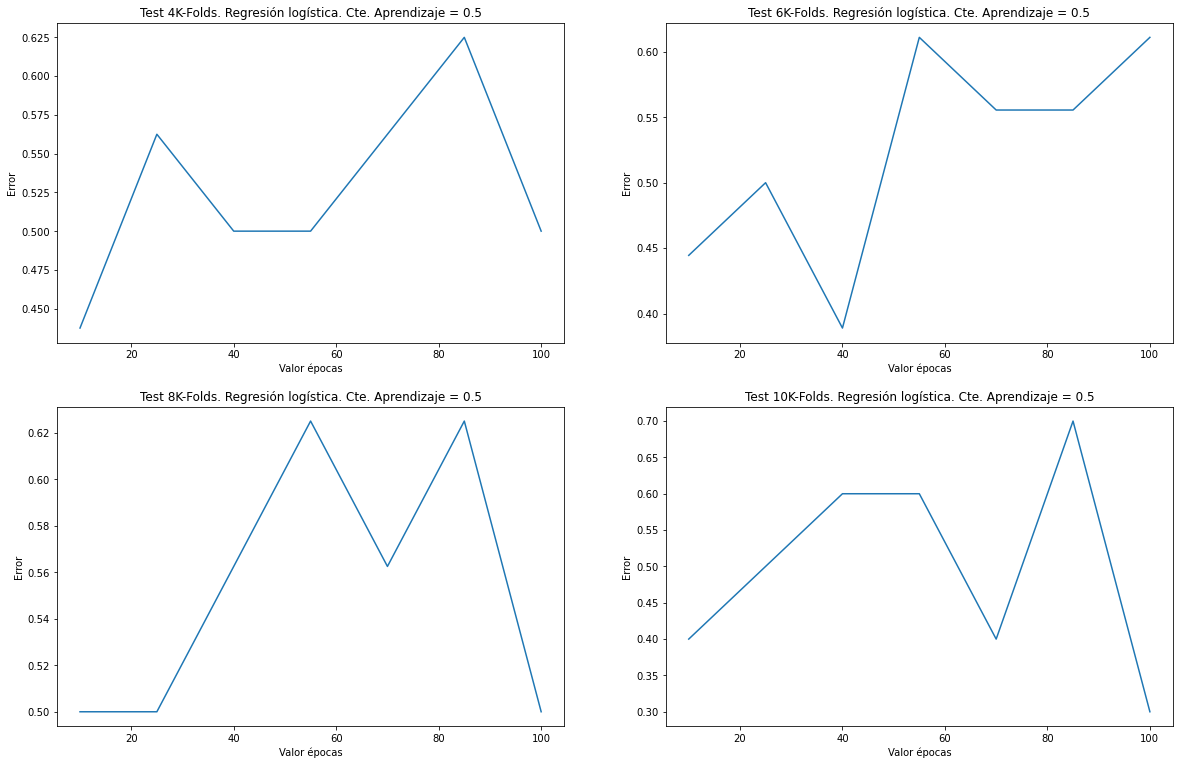

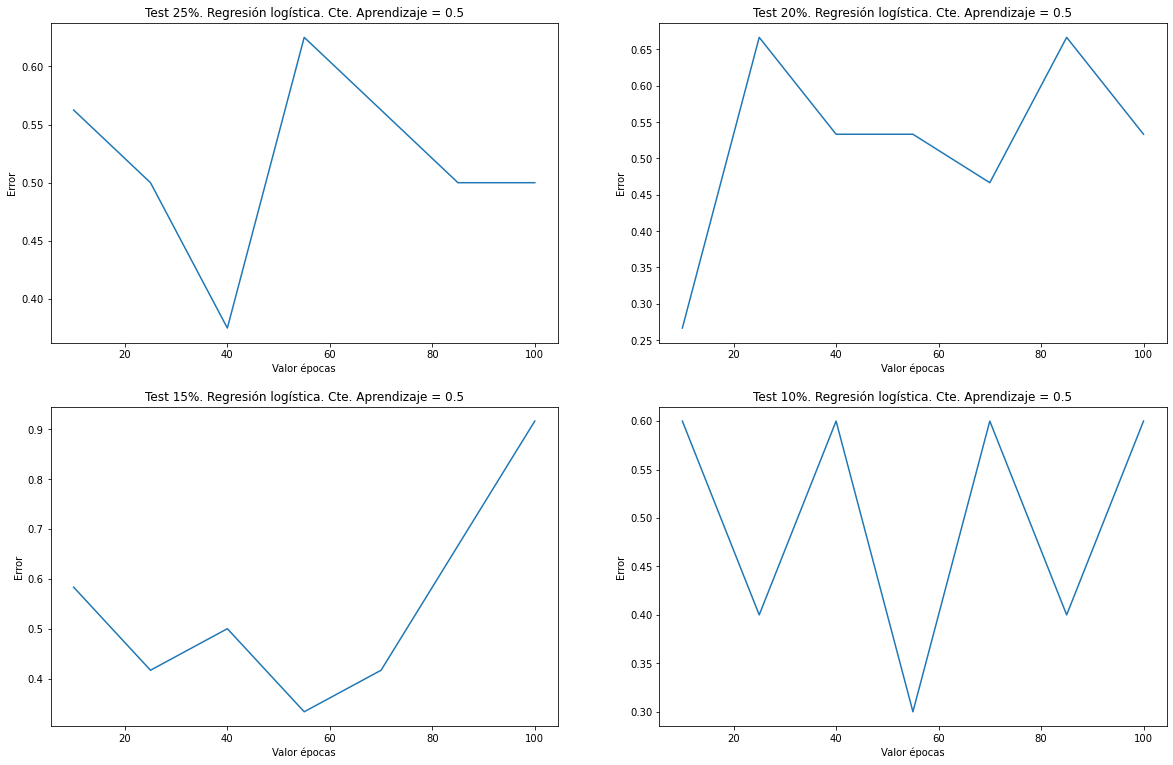

In [7]:
utils.plot_epoch(errorMedioWDBCVC, 0.5, False)
utils.plot_epoch(errorMedioWDBCVS, 0.5, True)

#### 1.1.2 *WDBC* Cte. aprendizaje=1.0

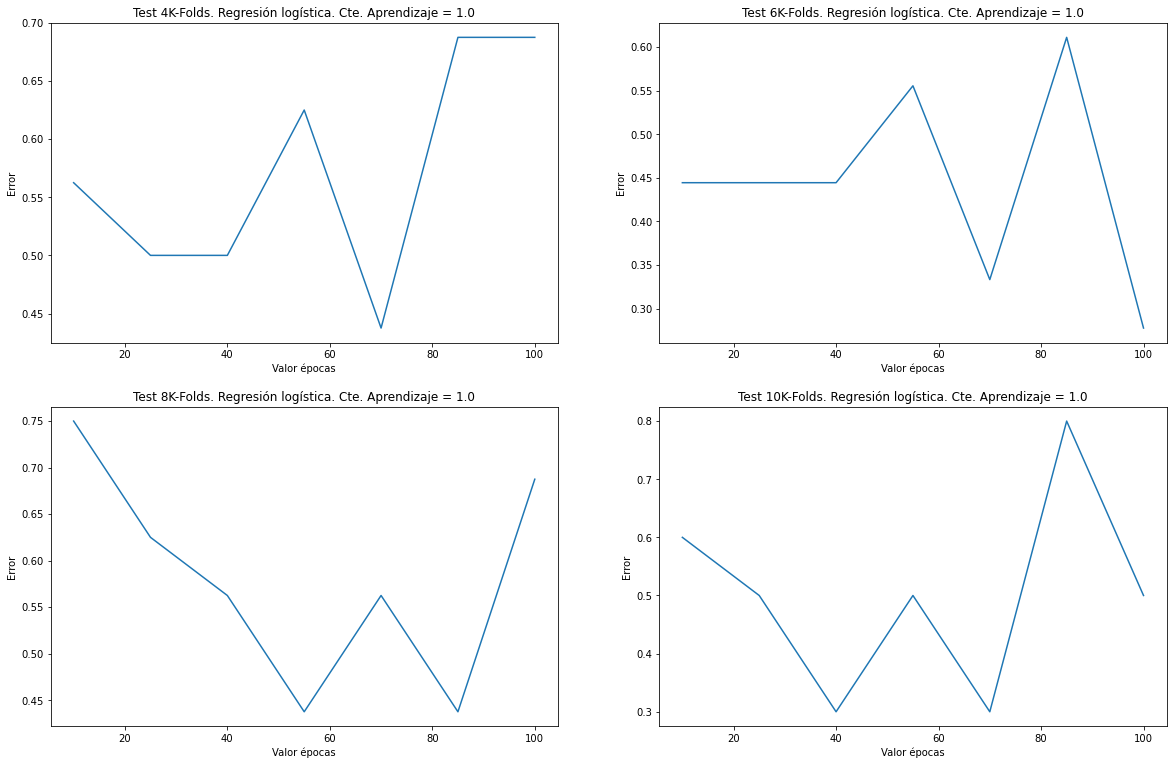

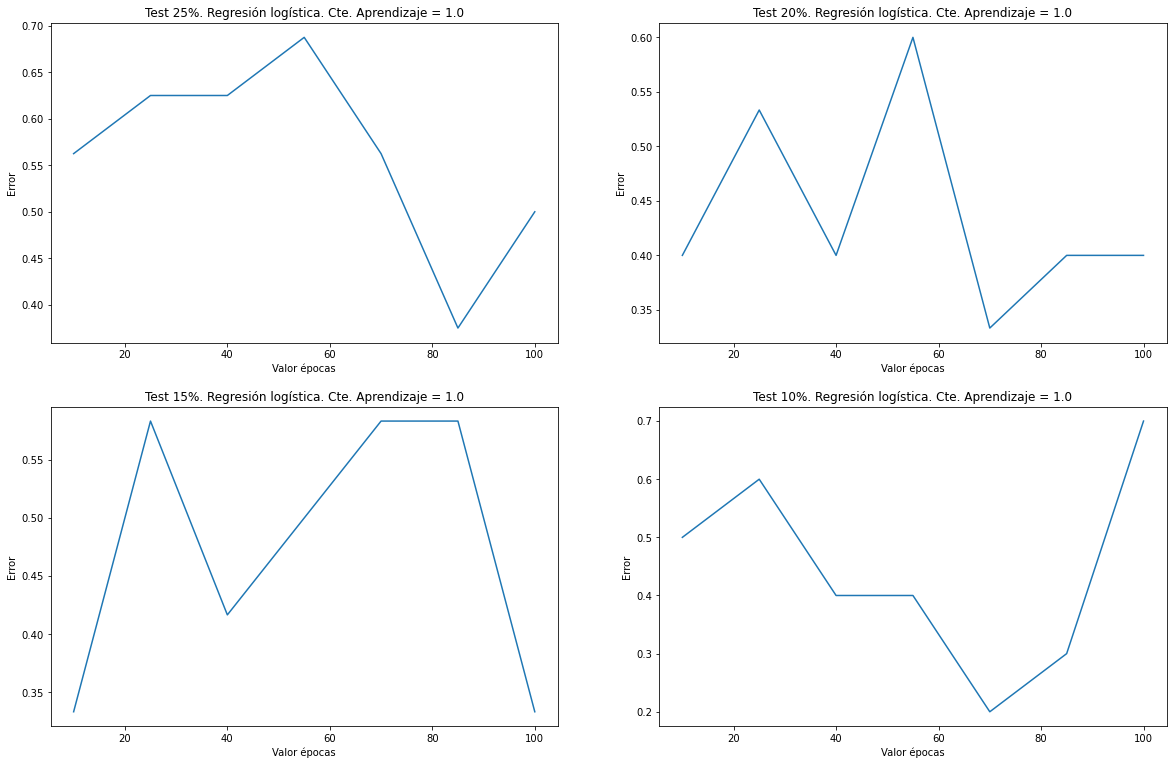

In [8]:
utils.plot_epoch(errorMedioWDBCVC, 1.0, False)
utils.plot_epoch(errorMedioWDBCVS, 1.0, True)

#### 1.1.2 *WDBC* Cte. aprendizaje=1.5

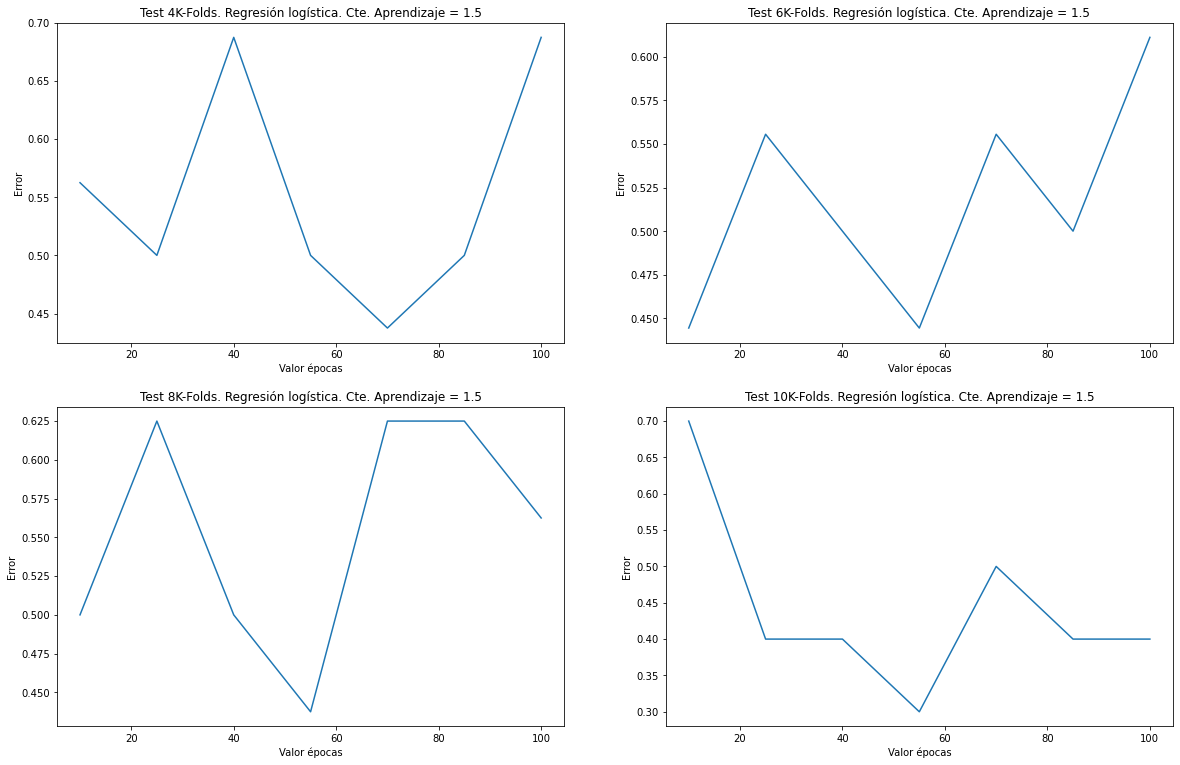

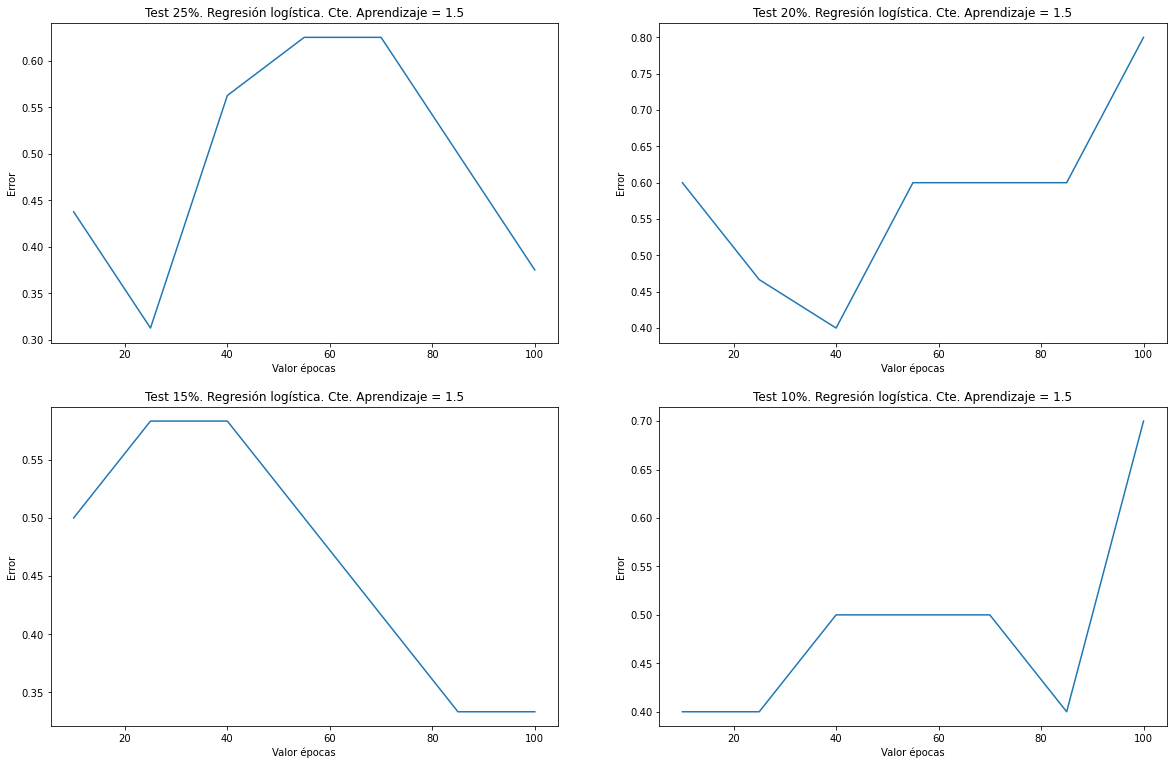

In [9]:
utils.plot_epoch(errorMedioWDBCVC, 1.5, False)
utils.plot_epoch(errorMedioWDBCVS, 1.5, True)

#### 1.1.2 *WDBC* Cte. aprendizaje=2.0

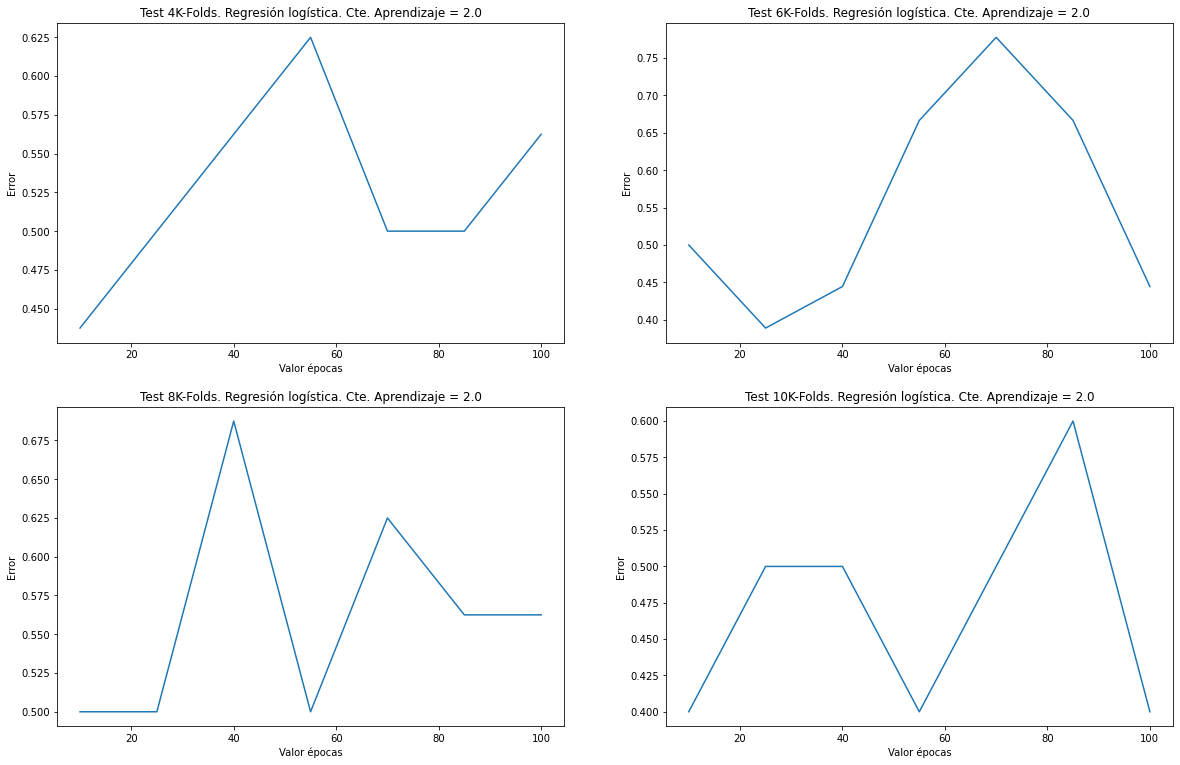

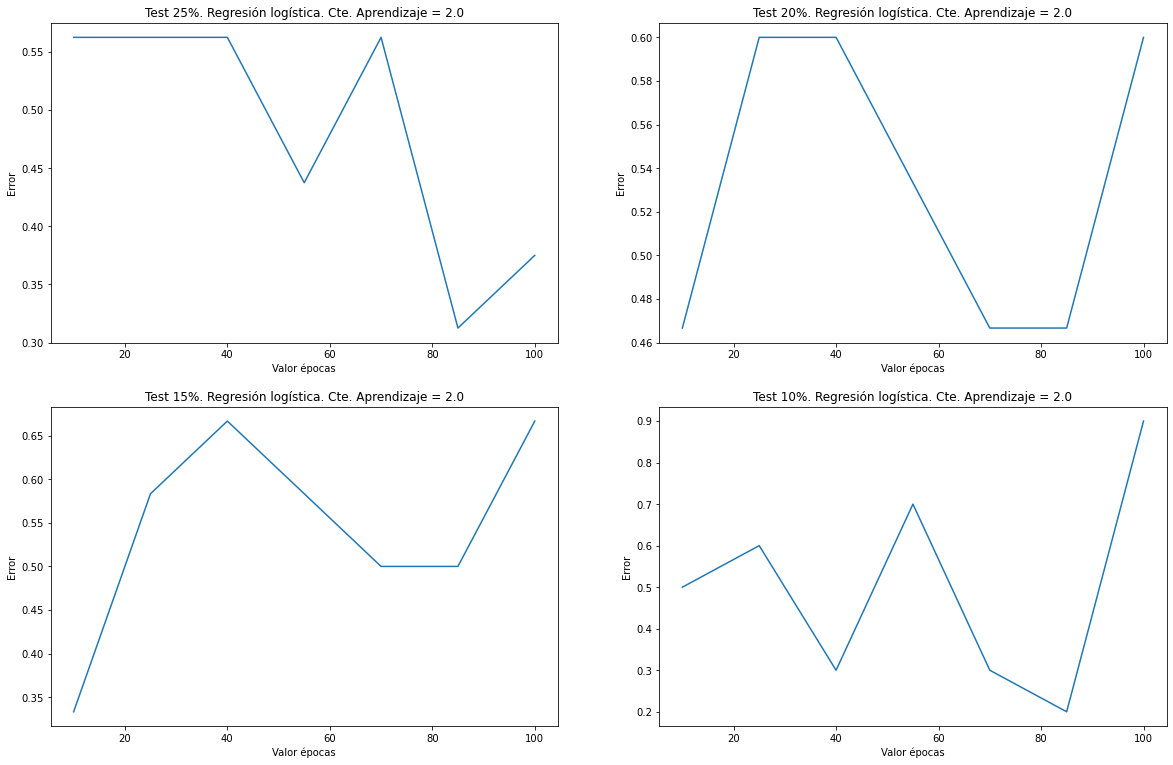

In [10]:
utils.plot_epoch(errorMedioWDBCVC, 2.0, False)
utils.plot_epoch(errorMedioWDBCVS, 2.0, True)

# EXPLICACIÓN EVOLUCION DE EPOCH EN WDBC
### 1.2 Efecto de la Cte. de aprendizaje
Ahora veremos como se desarrolla el error en base al valor que se le da a la constante de aprendizaje. Para esto se usará un determinado número de épocas (donde se da un menor error), de esta forma se vera el impacto de la cte. 

#### 1.2.1 *Pima-Indians-Diabetes* Épocas = 100 CAMBIAR ÉPOCAS

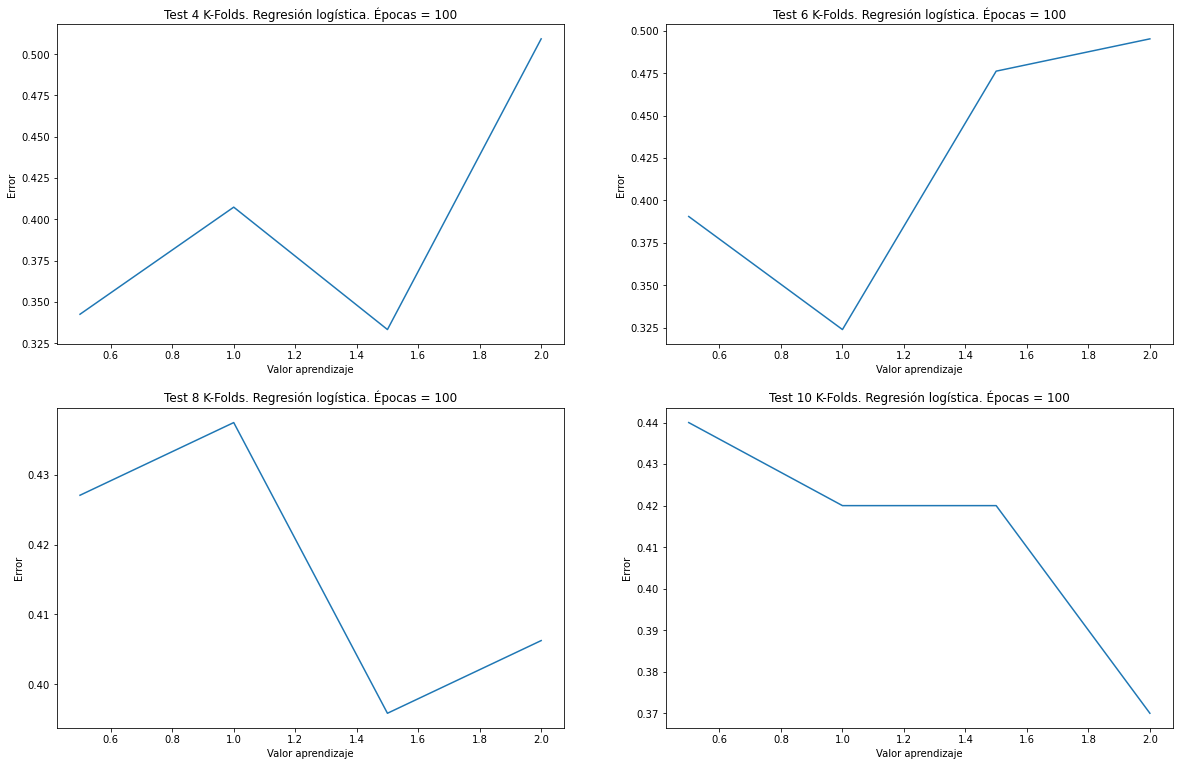

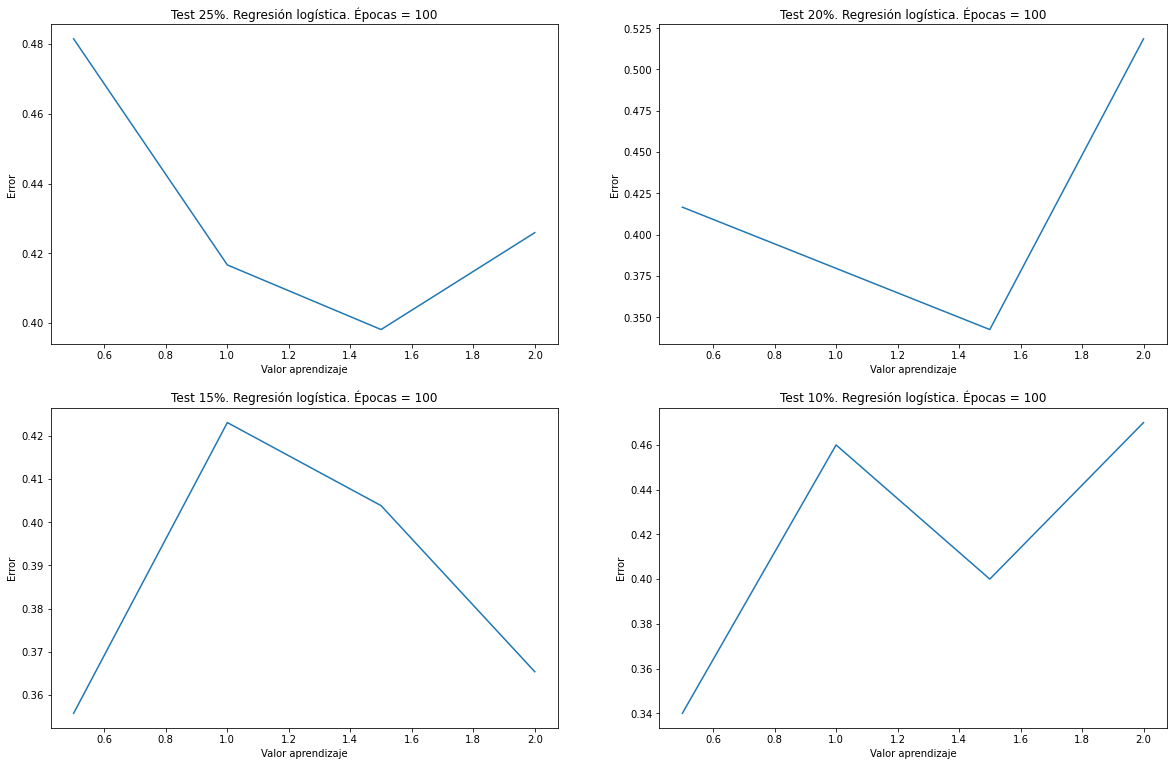

In [11]:
utils.plot_aprendizaje(errorMedioPimaVS, 100, False)
utils.plot_aprendizaje(errorMedioPimaVC, 100, True)

# EXPLICAR EVOLUCION DEL ERROR CON RESPECTO A LA CTE EN PIMA
#### 1.2.2 *WDBC* Épocas = 100 CAMBIAR ÉPOCAS

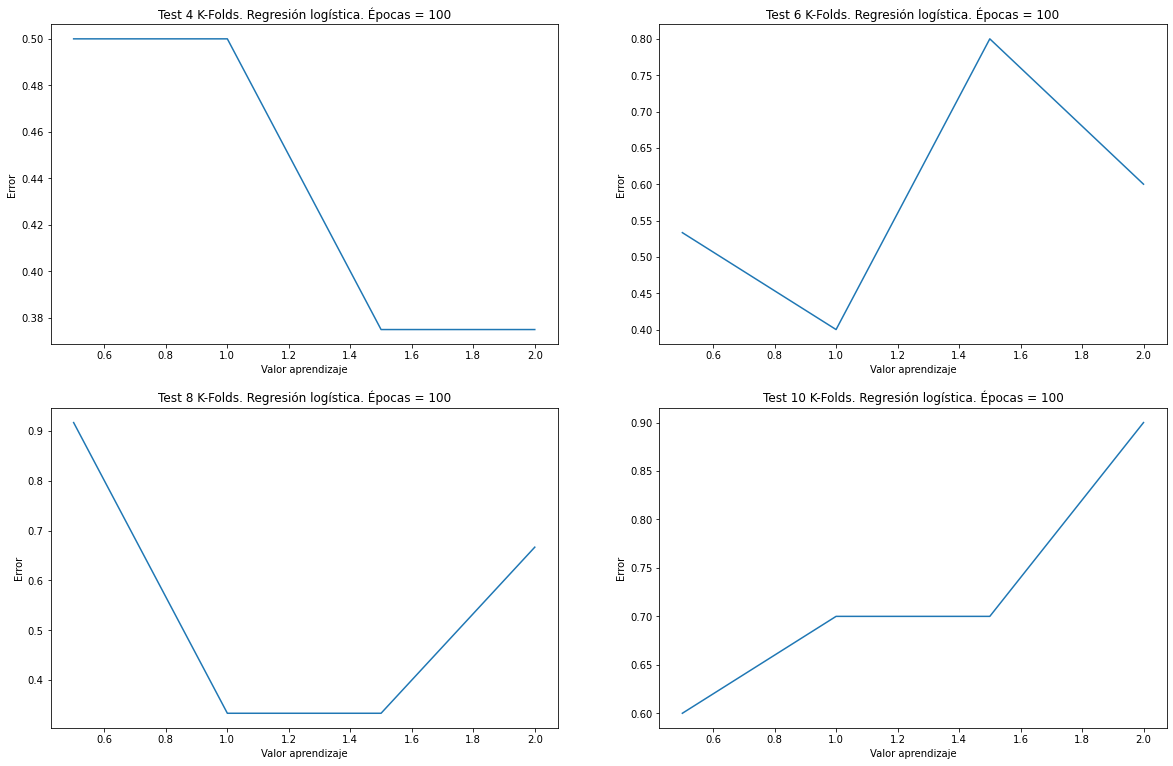

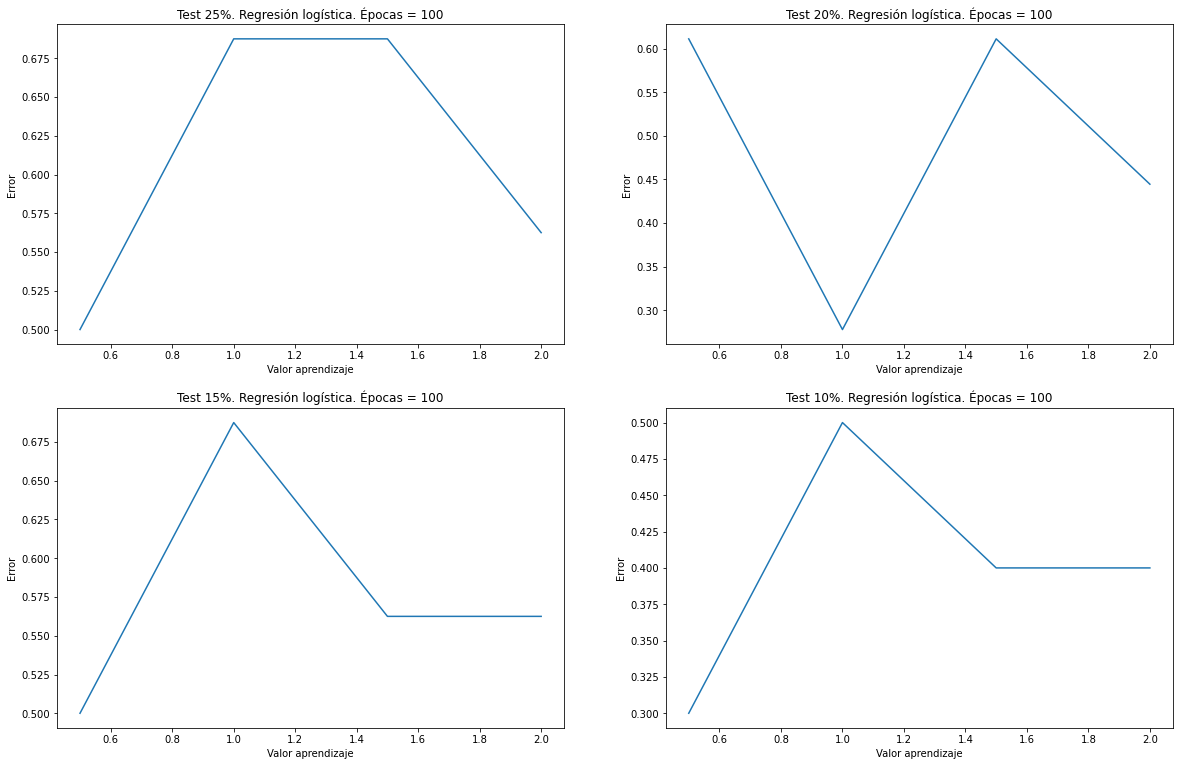

In [12]:
utils.plot_aprendizaje(errorMedioWDBCVS, 100, False)
utils.plot_aprendizaje(errorMedioWDBCVC, 100, True)

# EXPLICAR EVOLUCION DEL ERROR CON RESPECTO A LA CTE EN WDBC
#### 1.2.3 Error medio PIMA

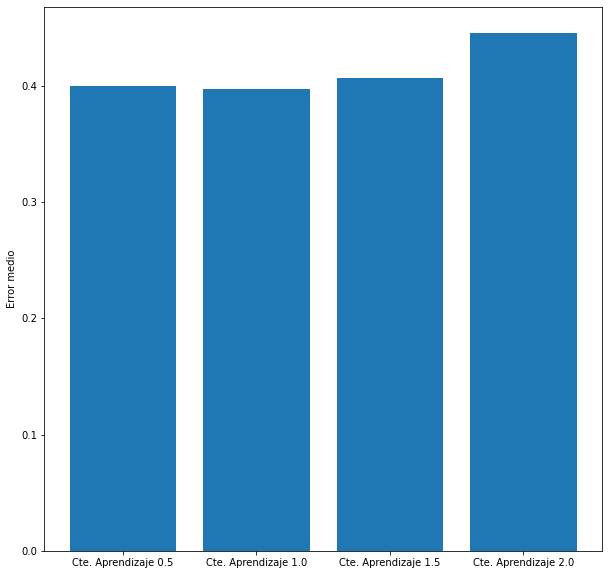

In [13]:
datos = (errorMedioPimaVS, errorMedioPimaVS)
utils.plot_histograms(datos, 100)

# EXPLICAR QUE CONSTANTE OFRECE MEJORES RESULTADOS PIMA
#### 1.2.4 Error medio WDBC

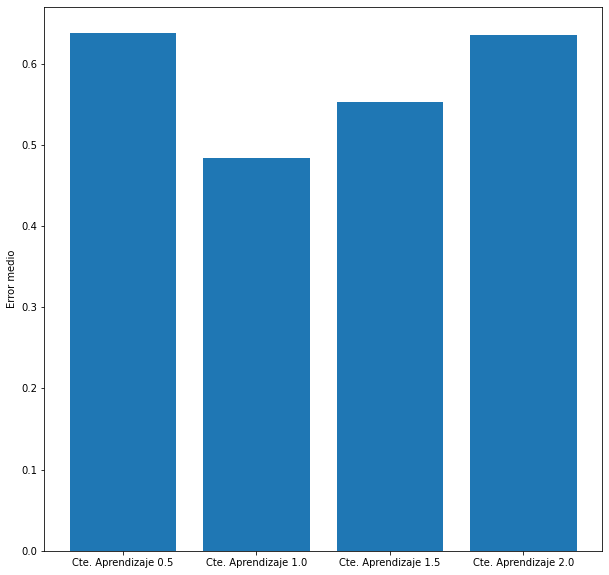

In [14]:
datos = (errorMedioWDBCVS, errorMedioWDBCVS)
utils.plot_histograms(datos, 100)

# EXPLICAR QUE CONSTANTE OFRECE MEJORES RESULTADOS WDBC
## 1.3 CONCLUSIÓN
Mencionar:
* pocas epoch malo
* muchas epoch malo (innecesario)
* Punto medio depende del problema y del dataset
* cte. aprendizaje mejor
* Como afecta la constante de aprendizaje (movimientos en los pesos más bruscos)

## 2. Resultados Regresión Logística (Implementación SKLearn)
De nuevo, se van a mostrar tablas con la tasa de error que cometen los modelos de **SKLearn**. En estos tests la constante de aprendizaje varía entre **[0.5-2]** (en pasos de 0.5), y el número de épocas varía desde **[10-2000]** (en pasos de 15 hasta 100, y en pasos de 100 hasta 2000).

Antes de mostrar los datos responderemos a la siguiente pregunta:

### Diferencia entre *LogisticRegression* y *SGDClassifier*

Responder diferencia

### Tablas *Logistic Regression* (sin cte aprendizaje)

In [15]:
errorMedioPimaVC_logistic, errorMedioPimaVS_logistic, errorMedioWDBCVC_logistic, errorMedioWDBCVS_logistic = utils.RL_test_SK_logistic(pima, wdbc)


*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=10*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=10				Pima - Error		WDBC - Error
Validación Simple 25%			0.370370		0.650000
Validación Cruzada K-Folds=4		0.342593		0.675000
Validación Simple 20%			0.318182		0.400000
Validación Cruzada K-Folds=6		0.305556		0.666667
Validación Simple 15%			0.411765		0.555556
Validación Cruzada K-Folds=8		0.333791		0.562500
Validación Simple 10%			0.427273		0.550000
Validación Cruzada K-Folds=10		0.310909		0.850000

*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=25*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=25				Pima - Error		WDBC - Error
Validación Simple 25%			0.370370		0.400000
Validación Cruzada K-Folds=4		0.324074		0.400000
Validación Simple 20%			0.300000		0.350000
Validación Cruzada K-Folds=6		0.361111		0.333333
Validación Simple 15%			0.254902		0.555556
Validación Cruzada K-Folds=8		0.343407		0.458333
Validación Simple 10%			0.318182		0.400000
Validación Cruzada K-Folds=10		0.340000		0.500000

*-*-*

### Tablas *SGBD Regression*

In [16]:
errorMedioPimaVC_SGBD, errorMedioPimaVS_SGBD, errorMedioWDBCVC_SGBD, errorMedioWDBCVS_SGBD = utils.RL_test_SK_SGBD(pima, wdbc)


*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=10*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=10 Constante aprendizaje=0.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.490741		0.600000
Validación Cruzada K-Folds=4			0.444444		0.450000
Validación Simple 20%				0.336364		0.400000
Validación Cruzada K-Folds=6			0.425926		0.555556
Validación Simple 15%				0.421569		0.611111
Validación Cruzada K-Folds=8			0.417582		0.458333
Validación Simple 10%				0.354545		0.450000
Validación Cruzada K-Folds=10			0.488182		0.400000
Test Épocas=10 Constante aprendizaje=1.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.435185		0.300000
Validación Cruzada K-Folds=4			0.435185		0.500000
Validación Simple 20%				0.436364		0.600000
Validación Cruzada K-Folds=6			0.398148		0.555556
Validación Simple 15%				0.441176		0.444444
Validación Cruzada K-Folds=8			0.473214		0.458333
Validación Simple 10%				0.554545		0.500000
Validación Cruzada K-Folds=10			0.424545		0.500000
Test Épocas=10 Constante ap

Validación Simple 10%				0.445455		0.650000
Validación Cruzada K-Folds=10			0.469091		0.500000

*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=70*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=70 Constante aprendizaje=0.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.472222		0.450000
Validación Cruzada K-Folds=4			0.435185		0.450000
Validación Simple 20%				0.436364		0.450000
Validación Cruzada K-Folds=6			0.351852		0.500000
Validación Simple 15%				0.352941		0.555556
Validación Cruzada K-Folds=8			0.425824		0.458333
Validación Simple 10%				0.463636		0.500000
Validación Cruzada K-Folds=10			0.388182		0.400000
Test Épocas=70 Constante aprendizaje=1.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.379630		0.550000
Validación Cruzada K-Folds=4			0.333333		0.500000
Validación Simple 20%				0.509091		0.500000
Validación Cruzada K-Folds=6			0.370370		0.555556
Validación Simple 15%				0.500000		0.611111
Validación Cruzada K-Folds=8			0.444368		0.458333
Validación Simple 10%				0.

### 2.1 Efecto del número de épocas.
A continuación se mostrarán varias gráficas en las cuales se puede ver la evolución del error con respecto al valor del número de épocas asignado para el entrenamiento. Como en 

#### 2.1.1.1 *LogisticRegression Pima-Indians-Diabetes* Cte. aprendizaje=0.5

#### 2.1.1.2 *LogisticRegression Pima-Indians-Diabetes* Cte. aprendizaje=1.0

#### 2.1.1.3 *LogisticRegression Pima-Indians-Diabetes* Cte. aprendizaje=1.5

#### 2.1.1.4 *LogisticRegression Pima-Indians-Diabetes* Cte. aprendizaje=2.0